In [19]:
# ======================================
#   PREPARATION BASE UCI POUR CATBOOST
# ======================================

import pandas as pd
import numpy as np

# 1) Charger la base depuis UCI
from ucimlrepo import fetch_ucirepo 

dataset = fetch_ucirepo(id=296)

# X = features brutes
X = dataset.data.features.copy()

# Y = cible brute (readmitted)
Y = dataset.data.targets.copy()

# Fusion pour nettoyage plus simple
data = pd.concat([X, Y], axis=1)

print("Shape brut :", data.shape)
display(data.head())

# ======================================
#   2) Nettoyage minimal des valeurs manquantes
# ======================================

data = data.replace(["?", "NA", "na", "NaN", "nan", "None", ""], np.nan)

# ======================================
#   3) Conversion de la cible readmitted en binaire
# ======================================

# Certaines versions UCI utilisent ("<30", ">30", "NO")
if data["readmitted"].dtype == "object":
    data["readmitted"] = data["readmitted"].replace({
        "<30": 1,
        ">30": 1,
        "NO": 0
    })

# Vérification
print("Valeurs uniques de la cible :", data["readmitted"].unique())

# ======================================
#   4) Séparation X / y
# ======================================

X = data.drop("readmitted", axis=1)
y = data["readmitted"].astype(int)

# ======================================
#   5) Détection automatique des colonnes catégorielles
# ======================================

cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

print(f"Nombre de colonnes catégorielles : {len(cat_features)}")
print("Aperçu des colonnes cat. :", cat_features[:20])

# ======================================
#   FIX : CatBoost n'accepte pas NaN dans les colonnes catégorielles
# ======================================

for col in cat_features:
    # convertir en string et remplacer les NaN
    X[col] = X[col].astype(str)
    X[col] = X[col].replace("nan", "Unknown")   # string "nan" que pandas produit

# ======================================
#   6) Split Train / Test
# ======================================

from sklearn.model_selection import train_test_split

X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Train :", X_train_cb.shape, "  Test :", X_test_cb.shape)

# ======================================
#   7) Vérification finale
# ======================================

print("\nTypes des variables dans le train:")
print(X_train_cb.dtypes)

print("\nAperçu du train :")
display(X_train_cb.head())


Shape brut : (101766, 48)


/Users/violetteseptier/Desktop/projet/applied/env/lib/python3.9/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


/var/folders/07/8l_1l3mn6ljb3c55z34_mw380000gn/T/ipykernel_87646/125778120.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["readmitted"] = data["readmitted"].replace({


Valeurs uniques de la cible : [0 1]
Nombre de colonnes catégorielles : 36
Aperçu des colonnes cat. : ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide']
Train : (81412, 47)   Test : (20354, 47)

Types des variables dans le train:
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
25118,AfricanAmerican,Female,[50-60),Unknown,1,1,7,5,Unknown,Family/GeneralPractice,...,No,No,No,No,No,No,No,No,No,No
63601,Caucasian,Female,[70-80),Unknown,1,1,7,4,MC,Unknown,...,No,No,Steady,No,No,No,No,No,No,Yes
19781,Caucasian,Male,[60-70),Unknown,5,3,17,3,Unknown,Orthopedics-Reconstructive,...,No,No,No,No,No,No,No,No,Ch,Yes
94149,Caucasian,Male,[80-90),Unknown,1,1,7,3,BC,Unknown,...,No,No,No,No,No,No,No,No,No,Yes
68161,Caucasian,Female,[70-80),Unknown,5,3,1,4,MC,Unknown,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [20]:
# ======================================
#   CATBOOST : ENTRAINEMENT & EVALUATION
# ======================================

from catboost import CatBoostClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, brier_score_loss,
    precision_recall_curve, classification_report, confusion_matrix, f1_score
)

# === 1. Entraînement CatBoost ===

cat_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function="Logloss",
    eval_metric="AUC",
    class_weights=[1, 4],     # gère le déséquilibre (à ajuster si besoin)
    random_seed=42,
    verbose=100
)

cat_model.fit(
    X_train_cb, y_train_cb,
    cat_features=cat_features,
    eval_set=(X_test_cb, y_test_cb)
)

# === 2. Probabilités sur le test ===

proba_cat = cat_model.predict_proba(X_test_cb)[:, 1]

# === 3. Métriques probabilistes ===

roc_auc_cat = roc_auc_score(y_test_cb, proba_cat)
pr_auc_cat  = average_precision_score(y_test_cb, proba_cat)
brier_cat   = brier_score_loss(y_test_cb, proba_cat)

print("\n=== Performances CATBOOST sur test ===")
print(f"ROC-AUC : {roc_auc_cat:.4f}")
print(f"PR-AUC  : {pr_auc_cat:.4f}")
print(f"Brier   : {brier_cat:.5f}")

# === 4. Seuil optimal F1 ===

prec_cat, rec_cat, thr_cat = precision_recall_curve(y_test_cb, proba_cat)
f1_curve_cat = 2 * prec_cat * rec_cat / (prec_cat + rec_cat + 1e-12)

best_idx_cat = int(f1_curve_cat.argmax())
best_thr_cat = thr_cat[max(best_idx_cat - 1, 0)] if len(thr_cat) > 0 else 0.5

print(f"\nSeuil optimal CATBOOST (F1 max) : {best_thr_cat:.4f}")

# Prédiction binaire
y_pred_cat = (proba_cat >= best_thr_cat).astype(int)

# === 5. F1 pos / F1 neg / Harmonic F1 ===

f1_pos_cat = f1_score(y_test_cb, y_pred_cat)
f1_neg_cat = f1_score(1 - y_test_cb, 1 - y_pred_cat)
harm_cat   = (2 * f1_pos_cat * f1_neg_cat) / (f1_pos_cat + f1_neg_cat + 1e-12)

print("\n=== F1 Scores CATBOOST ===")
print(f"F1_POS      : {f1_pos_cat:.4f}")
print(f"F1_NEG      : {f1_neg_cat:.4f}")
print(f"Harmonic F1 : {harm_cat:.4f}")

# === 6. Classification report ===

print("\n=== Rapport de classification CATBOOST (test) ===")
print(classification_report(y_test_cb, y_pred_cat, digits=3))

# === 7. Matrice de confusion ===

cm_cat = confusion_matrix(y_test_cb, y_pred_cat)
print("Matrice de confusion (test):\n", cm_cat)


0:	test: 0.5766645	best: 0.5766645 (0)	total: 74.8ms	remaining: 37.3s
100:	test: 0.6972136	best: 0.6972136 (100)	total: 14.2s	remaining: 56.2s
200:	test: 0.7026783	best: 0.7026783 (200)	total: 29.7s	remaining: 44.1s
300:	test: 0.7063611	best: 0.7063611 (300)	total: 45.6s	remaining: 30.1s
400:	test: 0.7079148	best: 0.7079156 (399)	total: 1m 2s	remaining: 15.5s
499:	test: 0.7089084	best: 0.7089084 (499)	total: 1m 23s	remaining: 0us

bestTest = 0.7089084153
bestIteration = 499


=== Performances CATBOOST sur test ===
ROC-AUC : 0.7089
PR-AUC  : 0.6703
Brier   : 0.29415

Seuil optimal CATBOOST (F1 max) : 0.6783

=== F1 Scores CATBOOST ===
F1_POS      : 0.6649
F1_NEG      : 0.5041
Harmonic F1 : 0.5734

=== Rapport de classification CATBOOST (test) ===
              precision    recall  f1-score   support

           0      0.760     0.377     0.504     10973
           1      0.542     0.861     0.665      9381

    accuracy                          0.600     20354
   macro avg      0.651   

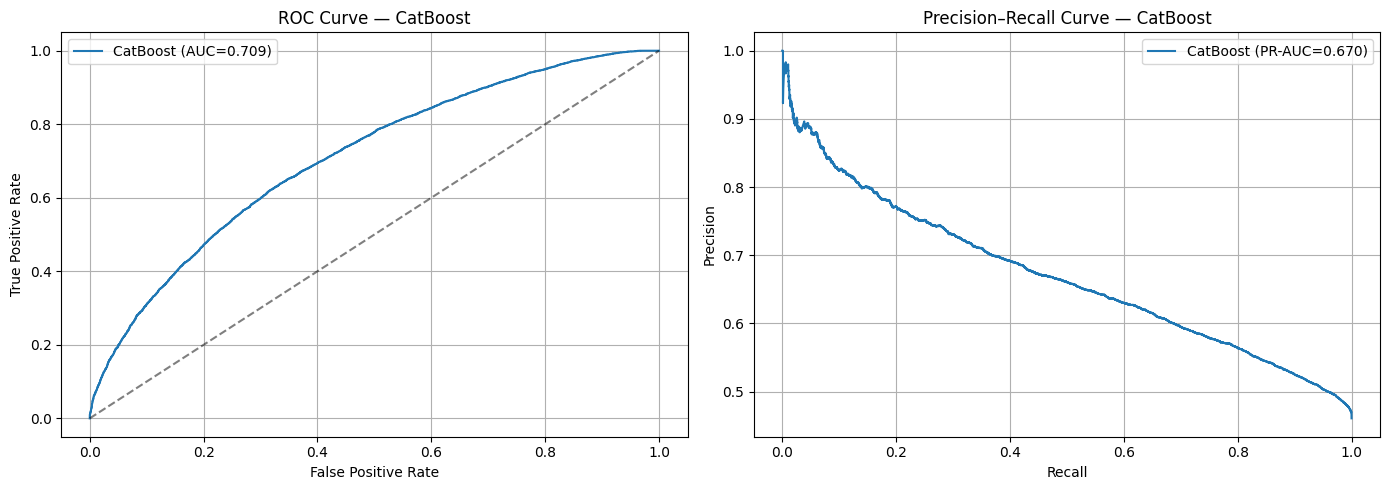

In [21]:
# ======================================
#   PLOTS CATBOOST : ROC + PR CURVES
# ======================================

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(14,5))

# -------------------------------------------------------
# 1) ROC curve
# -------------------------------------------------------
plt.subplot(1,2,1)
fpr_cat, tpr_cat, _ = roc_curve(y_test_cb, proba_cat)

plt.plot(fpr_cat, tpr_cat, label=f"CatBoost (AUC={roc_auc_cat:.3f})")
plt.plot([0,1], [0,1], "k--", alpha=0.5)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — CatBoost")
plt.grid(True)
plt.legend()

# -------------------------------------------------------
# 2) Precision–Recall curve
# -------------------------------------------------------
plt.subplot(1,2,2)
plt.plot(rec_cat, prec_cat, label=f"CatBoost (PR-AUC={pr_auc_cat:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — CatBoost")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#adaboost

In [22]:
X = pd.read_csv("data/X_final.csv")
y = pd.read_csv("data/y.csv").squeeze()
y.name = "target"

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# diag_1, diag_2, diag_3 sont des codes ICD-9. On les regroupe en catégories médicales.

from sklearn.preprocessing import OrdinalEncoder

def map_icd9(code):
    if code.startswith('V') or code.startswith('E'):
        return 'Other'
    try:
        c = float(code)
    except:
        return 'Other' 
    if 390 <= c <= 459 or c == 785: return 'Circulatory'
    if 460 <= c <= 519 or c == 786: return 'Respiratory'
    if 520 <= c <= 579 or c == 787: return 'Digestive'
    if str(int(c)).startswith('250'): return 'Diabetes'
    if 800 <= c <= 999: return 'Injury'
    if 710 <= c <= 739: return 'Musculoskeletal'
    if 580 <= c <= 629 or c == 788: return 'Genitourinary'
    if 140 <= c <= 239: return 'Neoplasms'
    return 'Other'

for col in ['diag_1', 'diag_2', 'diag_3']:
    X[col] = X[col].astype(str).apply(map_icd9)


# Identifie les colonnes non numériques (normalement diag_1, diag_2, diag_3)
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
print("Colonnes non numériques :", list(non_numeric_cols))

# Encodage ordinal
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[non_numeric_cols] = encoder.fit_transform(X[non_numeric_cols])

# Vérification
print(X.dtypes.value_counts())


# Split stratifié train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, brier_score_loss,
    precision_recall_curve, classification_report, confusion_matrix, f1_score
)


# ======================================
#        ADABOOST : ENTRAINEMENT & TEST
# ======================================

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, brier_score_loss,
    precision_recall_curve, classification_report, confusion_matrix, f1_score
)

# === 1. Modèle AdaBoost ===
# Stump par défaut, on peut mettre un arbre plus profond si besoin.

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=0.5,
    random_state=42
)


ada.fit(X_train, y_train)

# === 2. Probabilités sur test ===
proba_ada = ada.predict_proba(X_test)[:, 1]

# === 3. Métriques probabilistes ===
roc_auc_ada = roc_auc_score(y_test, proba_ada)
pr_auc_ada  = average_precision_score(y_test, proba_ada)
brier_ada   = brier_score_loss(y_test, proba_ada)

print("\n=== Performances ADABOOST sur test ===")
print(f"ROC-AUC : {roc_auc_ada:.4f}")
print(f"PR-AUC  : {pr_auc_ada:.4f}")
print(f"Brier   : {brier_ada:.5f}")

# === 4. Seuil optimal F1 ===
prec_ada, rec_ada, thr_ada = precision_recall_curve(y_test, proba_ada)
f1_curve_ada = 2 * prec_ada * rec_ada / (prec_ada + rec_ada + 1e-12)

best_idx_ada = int(f1_curve_ada.argmax())
best_thr_ada = thr_ada[max(best_idx_ada - 1, 0)] if len(thr_ada) > 0 else 0.5

print(f"\nSeuil optimal ADABOOST (F1 max) : {best_thr_ada:.4f}")

# Prédiction binaire
y_pred_ada = (proba_ada >= best_thr_ada).astype(int)

# === 5. F1 Scores ===
f1_pos_ada = f1_score(y_test, y_pred_ada)
f1_neg_ada = f1_score(1 - y_test, 1 - y_pred_ada)
harm_ada   = (2 * f1_pos_ada * f1_neg_ada) / (f1_pos_ada + f1_neg_ada + 1e-12)

print("\n=== F1 Scores ADABOOST ===")
print(f"F1_POS      : {f1_pos_ada:.4f}")
print(f"F1_NEG      : {f1_neg_ada:.4f}")
print(f"Harmonic F1 : {harm_ada:.4f}")

# === 6. Rapport de classification ===
print("\n=== Rapport de classification ADABOOST (test) ===")
print(classification_report(y_test, y_pred_ada, digits=3))

# === 7. Matrice de confusion ===
cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Matrice de confusion (test):\n", cm_ada)


Colonnes non numériques : ['diag_1', 'diag_2', 'diag_3']
float64    29
int64      25
Name: count, dtype: int64


/Users/violetteseptier/Desktop/projet/applied/env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Performances ADABOOST sur test ===
ROC-AUC : 0.6603
PR-AUC  : 0.2069
Brier   : 0.24618

Seuil optimal ADABOOST (F1 max) : 0.4969

=== F1 Scores ADABOOST ===
F1_POS      : 0.2755
F1_NEG      : 0.8344
Harmonic F1 : 0.4142

=== Rapport de classification ADABOOST (test) ===
              precision    recall  f1-score   support

           0      0.917     0.766     0.834     17398
           1      0.198     0.454     0.275      2213

    accuracy                          0.730     19611
   macro avg      0.557     0.610     0.555     19611
weighted avg      0.836     0.730     0.771     19611

Matrice de confusion (test):
 [[13320  4078]
 [ 1208  1005]]


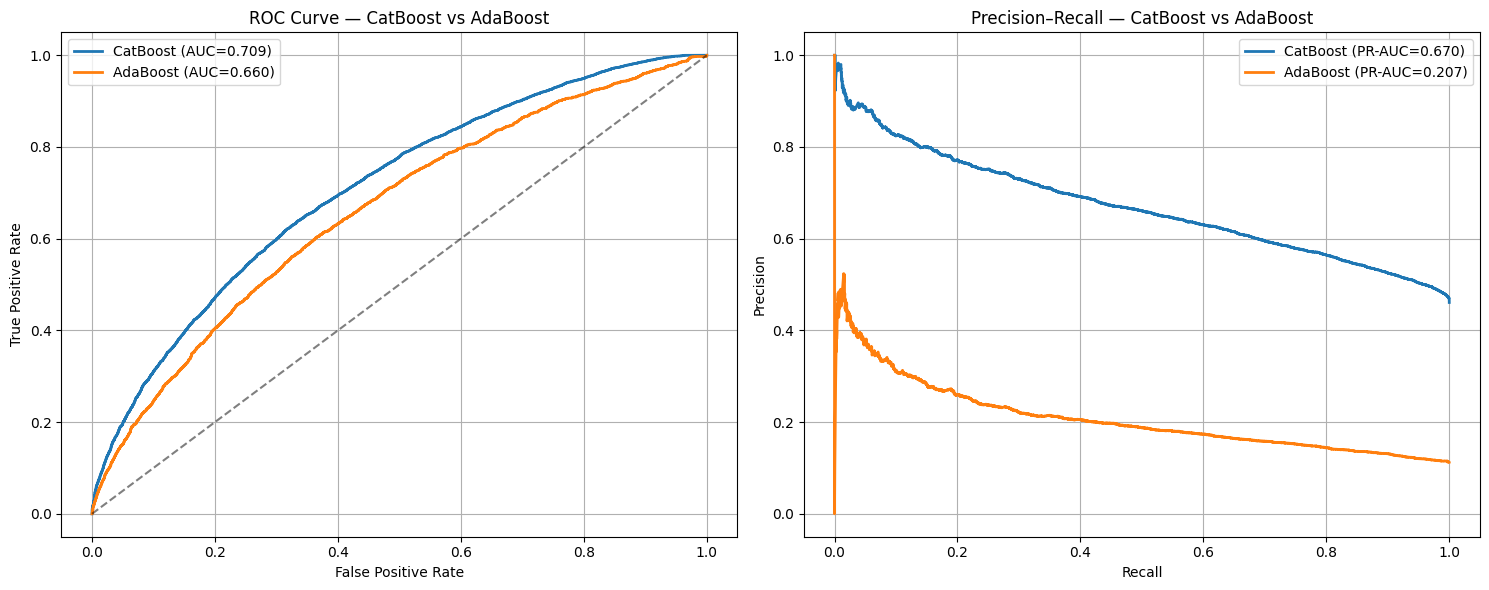

In [23]:
# ======================================
#   ROC & PR COMPARATIFS : ADABOOST vs CATBOOST
# ======================================

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

# --- Courbes ROC ---
fpr_cat, tpr_cat, _ = roc_curve(y_test_cb, proba_cat)
fpr_ada, tpr_ada, _ = roc_curve(y_test, proba_ada)

# --- Courbes PR ---
prec_cb_plot, rec_cb_plot, _ = precision_recall_curve(y_test_cb, proba_cat)
prec_ada_plot, rec_ada_plot, _ = precision_recall_curve(y_test, proba_ada)

plt.figure(figsize=(15,6))

# ----------------------------------------------------
# 1) ROC COMPARATIF
# ----------------------------------------------------
plt.subplot(1,2,1)

plt.plot(fpr_cat, tpr_cat, label=f"CatBoost (AUC={roc_auc_cat:.3f})", linewidth=2)
plt.plot(fpr_ada, tpr_ada, label=f"AdaBoost (AUC={roc_auc_ada:.3f})", linewidth=2)

plt.plot([0,1],[0,1], "k--", alpha=0.5)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — CatBoost vs AdaBoost")
plt.grid(True)
plt.legend()


# ----------------------------------------------------
# 2) PRECISION–RECALL COMPARATIF
# ----------------------------------------------------
plt.subplot(1,2,2)

plt.plot(rec_cb_plot, prec_cb_plot, 
         label=f"CatBoost (PR-AUC={pr_auc_cat:.3f})", linewidth=2)
plt.plot(rec_ada_plot, prec_ada_plot, 
         label=f"AdaBoost (PR-AUC={pr_auc_ada:.3f})", linewidth=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall — CatBoost vs AdaBoost")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# xboost

In [25]:
# ======================================
#   XGBOOST : ENTRAINEMENT & EVALUATION
# ======================================

from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, brier_score_loss,
    precision_recall_curve, classification_report, confusion_matrix, f1_score
)

# === 1. Modèle XGBoost ===
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    gamma=0,
    objective="binary:logistic",
    eval_metric="logloss",     # important pour éviter warning
    tree_method="hist",        # RAPIDE
    random_state=42
)
# Nettoyage des noms de colonnes pour XGBoost
X_train.columns = (
    X_train.columns.astype(str)
        .str.replace('[', '(', regex=False)
        .str.replace(']', ')', regex=False)
        .str.replace('<', 'inf_', regex=False)
        .str.replace('>', 'sup_', regex=False)
        .str.replace(',', '_', regex=False)
        .str.replace(' ', '_', regex=False)
)

X_test.columns = X_train.columns  # aligner les deux


xgb.fit(X_train, y_train)

# === 2. Probabilités ===
proba_xgb = xgb.predict_proba(X_test)[:, 1]

# === 3. Métriques probabilistes ===
roc_auc_xgb = roc_auc_score(y_test, proba_xgb)
pr_auc_xgb  = average_precision_score(y_test, proba_xgb)
brier_xgb   = brier_score_loss(y_test, proba_xgb)

print("\n=== Performances XGBOOST sur test ===")
print(f"ROC-AUC : {roc_auc_xgb:.4f}")
print(f"PR-AUC  : {pr_auc_xgb:.4f}")
print(f"Brier   : {brier_xgb:.5f}")

# === 4. Seuil optimal F1 ===
prec_xgb, rec_xgb, thr_xgb = precision_recall_curve(y_test, proba_xgb)
f1_curve_xgb = 2 * prec_xgb * rec_xgb / (prec_xgb + rec_xgb + 1e-12)

best_idx_xgb = int(f1_curve_xgb.argmax())
best_thr_xgb = thr_xgb[max(best_idx_xgb - 1, 0)] if len(thr_xgb) > 0 else 0.5

print(f"\nSeuil optimal XGBOOST (F1 max) : {best_thr_xgb:.4f}")

# Prédiction binaire
y_pred_xgb = (proba_xgb >= best_thr_xgb).astype(int)

# === 5. F1 Scores ===
f1_pos_xgb = f1_score(y_test, y_pred_xgb)
f1_neg_xgb = f1_score(1 - y_test, 1 - y_pred_xgb)
harm_xgb   = (2 * f1_pos_xgb * f1_neg_xgb) / (f1_pos_xgb + f1_neg_xgb + 1e-12)

print("\n=== F1 Scores XGBOOST ===")
print(f"F1_POS      : {f1_pos_xgb:.4f}")
print(f"F1_NEG      : {f1_neg_xgb:.4f}")
print(f"Harmonic F1 : {harm_xgb:.4f}")

# === 6. Classification report ===
print("\n=== Rapport de classification XGBOOST ===")
print(classification_report(y_test, y_pred_xgb, digits=3))

# === 7. Matrice de confusion ===
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Matrice de confusion (test):\n", cm_xgb)



=== Performances XGBOOST sur test ===
ROC-AUC : 0.6674
PR-AUC  : 0.2222
Brier   : 0.09564

Seuil optimal XGBOOST (F1 max) : 0.1284

=== F1 Scores XGBOOST ===
F1_POS      : 0.2794
F1_NEG      : 0.8151
Harmonic F1 : 0.4162

=== Rapport de classification XGBOOST ===
              precision    recall  f1-score   support

           0      0.921     0.731     0.815     17398
           1      0.193     0.506     0.279      2213

    accuracy                          0.706     19611
   macro avg      0.557     0.618     0.547     19611
weighted avg      0.839     0.706     0.755     19611

Matrice de confusion (test):
 [[12721  4677]
 [ 1094  1119]]


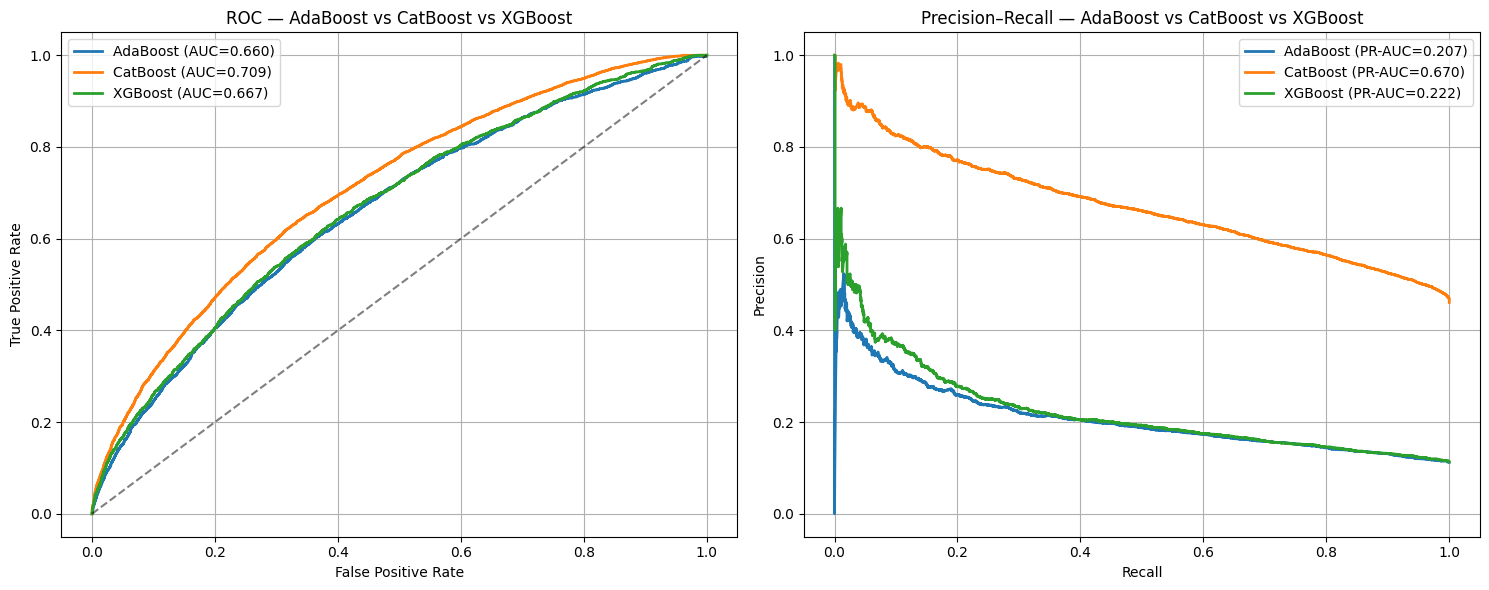

In [27]:
# CatBoost
y_true_cat = y_test_cb
# AdaBoost et XGBoost
y_true_ax  = y_test

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

plt.figure(figsize=(15,6))

# ============================
#       ROC CURVES
# ============================
plt.subplot(1,2,1)

# AdaBoost
fpr_ada, tpr_ada, _ = roc_curve(y_true_ax, proba_ada)
plt.plot(fpr_ada, tpr_ada, label=f"AdaBoost (AUC={roc_auc_ada:.3f})", linewidth=2)

# CatBoost
fpr_cat, tpr_cat, _ = roc_curve(y_true_cat, proba_cat)
plt.plot(fpr_cat, tpr_cat, label=f"CatBoost (AUC={roc_auc_cat:.3f})", linewidth=2)

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_true_ax, proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={roc_auc_xgb:.3f})", linewidth=2)

# Diagonale
plt.plot([0,1],[0,1],"k--", alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC — AdaBoost vs CatBoost vs XGBoost")
plt.grid(True)
plt.legend()


# ============================
#   PRECISION–RECALL CURVES
# ============================
plt.subplot(1,2,2)

# AdaBoost
prec_ada_plot, rec_ada_plot, _ = precision_recall_curve(y_true_ax, proba_ada)
plt.plot(rec_ada_plot, prec_ada_plot,
         label=f"AdaBoost (PR-AUC={pr_auc_ada:.3f})", linewidth=2)

# CatBoost
prec_cat_plot, rec_cat_plot, _ = precision_recall_curve(y_true_cat, proba_cat)
plt.plot(rec_cat_plot, prec_cat_plot,
         label=f"CatBoost (PR-AUC={pr_auc_cat:.3f})", linewidth=2)

# XGBoost
prec_xgb_plot, rec_xgb_plot, _ = precision_recall_curve(y_true_ax, proba_xgb)
plt.plot(rec_xgb_plot, prec_xgb_plot,
         label=f"XGBoost (PR-AUC={pr_auc_xgb:.3f})", linewidth=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall — AdaBoost vs CatBoost vs XGBoost")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



In [29]:
import pandas as pd
import numpy as np

# Importance brute
importance = cat_model.get_feature_importance()

# Création d’un tableau propre
feat_imp = pd.DataFrame({
    "Feature": X_train_cb.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print("\n=== Feature Importance CatBoost ===")
display(feat_imp.head(20))



=== Feature Importance CatBoost ===


,Feature,Importance
5,discharge_disposition_id,46.801433
15,number_inpatient,12.107765
16,diag_1,4.039106
6,admission_source_id,3.409604
9,medical_specialty,3.127466
8,payer_code,3.029219
17,diag_2,2.668546
14,number_emergency,2.454616
19,number_diagnoses,2.345698
12,num_medications,2.085889
